In [ ]:
import time
import warnings
import json
warnings.filterwarnings('ignore')

# **Install Requirements**

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


In [ ]:
# # Install the Transformers library - T5
# !pip install sentencepiece
# !pip install transformers

# # Install the OpenAI package for GPT-3
# !pip install openai

# # Rouge Metric Package - Common
# !pip install rouge-score

# # Matplotlib package - Common
# !pip install matplotlib

# **Using Hugging Face Transformers - T5**

In [ ]:
import transformers
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cuda')

# Load the T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-small')
model.cuda()
tokenizer = T5Tokenizer.from_pretrained('t5-small')

In [ ]:
# text = "Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.Â 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space in the overhead lockers, crashing elbows and seat back kicking? Tests conducted by the FAA use planes with a 31 inch pitch, a standard which on some airlines has decreased . Many economy seats on United Airlines have 30 inches of room, while some airlines offer as little as 28 inches . Cynthia Corbertt, a human factors researcher with the Federal Aviation Administration, that it conducts tests on how quickly passengers can leave a plane. But these tests are conducted using planes with 31 inches between each row of seats, a standard which on some airlines has decreased, reported the Detroit News. The distance between two seats from one point on a seat to the same point on the seat behind it is known as the pitch. While most airlines stick to a pitch of 31 inches or above, some fall below this. While United Airlines has 30 inches of space, Gulf Air economy seats have between 29 and 32 inches, Air Asia offers 29 inches and Spirit Airlines offers just 28 inches. British Airways has a seat pitch of 31 inches, while easyJet has 29 inches, Thomson's short haul seat pitch is 28 inches, and Virgin Atlantic's is 30-31."
import spacy
nlp = spacy.load('en_core_web_sm')

json_data = {}
with open("train_100.json") as data_file:
  json_data = json.load(data_file)

start = time.time()

for article_index, details in json_data.items():
  text = details['article']
  input_text = "summarize: " + text
  input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)

  print("+++++++++++++++++++++++++++ Article_Index :", article_index,"+++++++++++++++++++++++++++")
  summary = model.generate(input_ids, max_length=1000)
  summary_text = tokenizer.decode(summary[0], skip_special_tokens=True)
  print(summary_text)

  t5_summary = nlp(summary_text)
  details['t5_summary'] = summary_text
  details['t5_summary_len'] = len([s for s in t5_summary.sents])

end = time.time()

print("------------- TIME / ANALYSIS --------------")
print("Time Taken : ", (end-start)/60, "minutes")

Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors


+++++++++++++++++++++++++++ Article_Index : 0 +++++++++++++++++++++++++++
he says he has no plans to fritter cash away on fast cars, drink and celebrity parties. the actor says he'll be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II" he has filmed a television movie about author Rudyard Kipling and his son.
+++++++++++++++++++++++++++ Article_Index : 1 +++++++++++++++++++++++++++
inmates with most severe mental illnesses are incarcerated until they're ready to appear in court. judge says they often face drug charges or assault charges. "you need to get me out of here!" one man shouts at him.
+++++++++++++++++++++++++++ Article_Index : 2 +++++++++++++++++++++++++++
driver: "i probably had a 30-, 35-foot free fall. And there's cars on fire" dozens of people were on the bridge when it collapsed. rescuers, volunteers managed to get 55 people into ambulances in less than two hours. "it was just like out of the movies," survivor says.
+++++++++++++++

In [ ]:
import json

json_details = json.dumps(json_data)
f = open("train_t5_100.json","w")
f.write(json_details)
f.close()

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

json_data = {}
with open("train_all.json") as data_file:
  json_data = json.load(data_file)

start = time.time()

for article_index, details in json_data.items():
  text = details['article']
  input_text = "summarize: " + text
  input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)

  print("+++++++++++++++++++++++++++ Article_Index :", article_index,"+++++++++++++++++++++++++++")
  summary = model.generate(input_ids, max_length=500).to(device)
  summary_text = tokenizer.decode(summary[0], skip_special_tokens=True)
  print(summary_text)

  t5_summary = nlp(summary_text)
  details['t5_summary'] = summary_text
  details['t5_summary_len'] = len([s for s in t5_summary.sents])

end = time.time()

print("------------- TIME / ANALYSIS --------------")
print("Time Taken : ", (end-start)/60, "minutes")

Token indices sequence length is longer than the specified maximum sequence length for this model (789 > 512). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
+++++++++++++++++++++++++++ Article_Index : 8990 +++++++++++++++++++++++++++
'Scooby' van motored from Concord to Boston Logan International Airport. she was greeted by a secret service agent and a state trooper. the two women had the very front seats on the flight.
+++++++++++++++++++++++++++ Article_Index : 8991 +++++++++++++++++++++++++++
Joanna Goodall forged signatures of customers and colleagues for cash refunds. she took the money for herself and was given a nine-month suspended sentence. she was ordered to pay back just £1 under Proceeds of Crime Act.
+++++++++++++++++++++++++++ Article_Index : 8992 +++++++++++++++++++++++++++
the 30-year-old model took a string of selfies during her pregnancy. she posed for the first time on her facebook page. she said she was 'amazing' and 'loved' by her weight.
+++++++++++++++++++++++++++ Article_Index : 8993 +++++++++++++++++++++++++++
a national guard officer was sacked and three other sol

In [ ]:
import json

json_details = json.dumps(json_data)
f = open("train_t5_all.json","w")
f.write(json_details)
f.close()

# **ROUGE EVALUATION**

 **ROUGE EVALUATION FOR TRAIN_100 JSON DATA**

In [ ]:
import json
from rouge_score import rouge_scorer

json_data = {}

print("=======================================")
print("=============TRAIN_DATA_100============")
print("=======================================")
with open("train_t5_100.json") as data_file:
  json_data = json.load(data_file)

# print(json_data)

overall_precision_1 = 0
overall_recall_1 = 0
overall_fmeasure_1 = 0

overall_precision_2 = 0
overall_recall_2 = 0
overall_fmeasure_2 = 0

overall_precision_l = 0
overall_recall_l = 0
overall_fmeasure_l = 0

for article_index, details in json_data.items():
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores = scorer.score(details['t5_summary'], details['highlights'])
  
  precision1,recall1,fmeasure1 = scores['rouge1']
  overall_precision_1 += precision1
  overall_recall_1 += recall1
  overall_fmeasure_1 += fmeasure1
  
  precision2,recall2,fmeasure2 = scores['rouge2']
  overall_precision_2 += precision2
  overall_recall_2 += recall2
  overall_fmeasure_2 += fmeasure2
  
  precisionl,recalll,fmeasurel = scores['rougeL']
  overall_precision_l += precisionl
  overall_recall_l += recalll
  overall_fmeasure_l += fmeasurel

print("ROUGE-1 METRIC")
print("Overall Precision", overall_precision_1/len(json_data.keys()))
print("Overall Recall", overall_recall_1/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_1/len(json_data.keys()))

print("ROUGE-2 METRIC")
print("Overall Precision", overall_precision_2/len(json_data.keys()))
print("Overall Recall", overall_recall_2/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_2/len(json_data.keys()))

print("ROUGE-L METRIC")
print("Overall Precision", overall_precision_l/len(json_data.keys()))
print("Overall Recall", overall_recall_l/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_l/len(json_data.keys()))

metrics = {}
metrics['rouge1'] = [overall_precision_1/len(json_data.keys()), overall_recall_1/len(json_data.keys()), overall_fmeasure_1/len(json_data.keys())]
metrics['rouge2'] = [overall_precision_2/len(json_data.keys()), overall_recall_2/len(json_data.keys()), overall_fmeasure_2/len(json_data.keys())]
metrics['rougeL'] = [overall_precision_l/len(json_data.keys()), overall_recall_l/len(json_data.keys()), overall_fmeasure_l/len(json_data.keys())]
json = json.dumps(metrics)
f = open("t5_rouge_100.json","w")
f.write(json)
f.close()

=============TRAIN_DATA_100============
ROUGE-1 METRIC
Overall Precision 0.310223417473778
Overall Recall 0.2931263087847651
Overall Fmeasure 0.29620259479807315
ROUGE-2 METRIC
Overall Precision 0.10986565109937971
Overall Recall 0.1061197865063805
Overall Fmeasure 0.1059008860729914
ROUGE-L METRIC
Overall Precision 0.2167779064165835
Overall Recall 0.2046074803127824
Overall Fmeasure 0.20678684526368785


**ROUGE EVALUATION FOR TRAIN_ALL JSON DATA**

In [ ]:
import json
from rouge_score import rouge_scorer

json_data = {}

print("=======================================")
print("=============TRAIN_DATA_ALL============")
print("=======================================")
with open("train_t5_all.json") as data_file:
  json_data = json.load(data_file)

# print(json_data)

overall_precision_1 = 0
overall_recall_1 = 0
overall_fmeasure_1 = 0

overall_precision_2 = 0
overall_recall_2 = 0
overall_fmeasure_2 = 0

overall_precision_l = 0
overall_recall_l = 0
overall_fmeasure_l = 0

for article_index, details in json_data.items():
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores = scorer.score(details['t5_summary'], details['highlights'])
  
  precision1,recall1,fmeasure1 = scores['rouge1']
  overall_precision_1 += precision1
  overall_recall_1 += recall1
  overall_fmeasure_1 += fmeasure1
  
  precision2,recall2,fmeasure2 = scores['rouge2']
  overall_precision_2 += precision2
  overall_recall_2 += recall2
  overall_fmeasure_2 += fmeasure2
  
  precisionl,recalll,fmeasurel = scores['rougeL']
  overall_precision_l += precisionl
  overall_recall_l += recalll
  overall_fmeasure_l += fmeasurel

print("ROUGE-1 METRIC")
print("Overall Precision", overall_precision_1/len(json_data.keys()))
print("Overall Recall", overall_recall_1/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_1/len(json_data.keys()))

print("ROUGE-2 METRIC")
print("Overall Precision", overall_precision_2/len(json_data.keys()))
print("Overall Recall", overall_recall_2/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_2/len(json_data.keys()))

print("ROUGE-L METRIC")
print("Overall Precision", overall_precision_l/len(json_data.keys()))
print("Overall Recall", overall_recall_l/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_l/len(json_data.keys()))

metrics = {}
metrics['rouge1'] = [overall_precision_1/len(json_data.keys()), overall_recall_1/len(json_data.keys()), overall_fmeasure_1/len(json_data.keys())]
metrics['rouge2'] = [overall_precision_2/len(json_data.keys()), overall_recall_2/len(json_data.keys()), overall_fmeasure_2/len(json_data.keys())]
metrics['rougeL'] = [overall_precision_l/len(json_data.keys()), overall_recall_l/len(json_data.keys()), overall_fmeasure_l/len(json_data.keys())]
json = json.dumps(metrics)
f = open("t5_rouge_all.json","w")
f.write(json)
f.close()

=============TRAIN_DATA_ALL============
ROUGE-1 METRIC
Overall Precision 0.33841387624448616
Overall Recall 0.4024603152306834
Overall Fmeasure 0.35607742278611504
ROUGE-2 METRIC
Overall Precision 0.13860165594675045
Overall Recall 0.16435317741790775
Overall Fmeasure 0.14554879479353447
ROUGE-L METRIC
Overall Precision 0.23941206836273032
Overall Recall 0.28221651144306226
Overall Fmeasure 0.250852467050716


**Visualizing the ROUGE Metric**

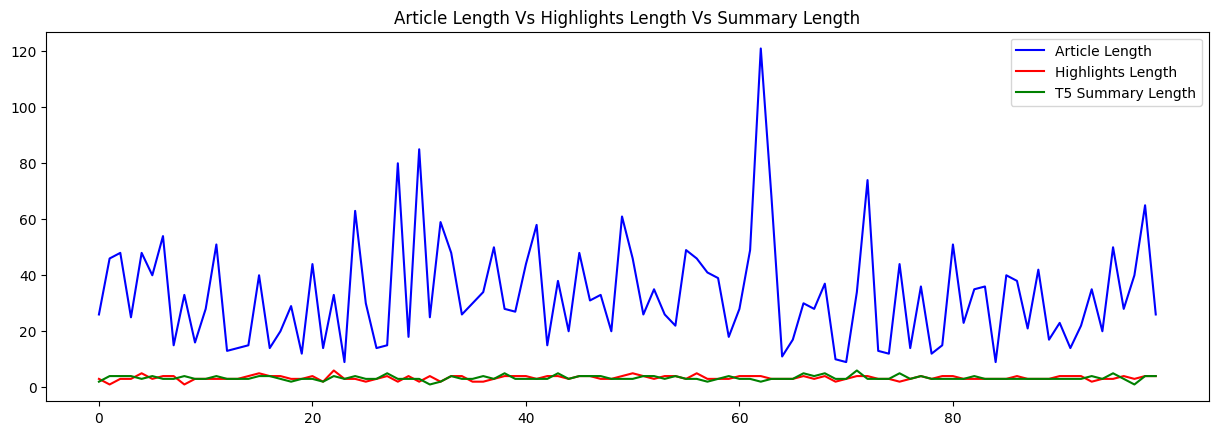

In [ ]:
import matplotlib.pyplot as plt 
import json
import numpy as np

json_data = {}

with open("train_t5_100.json") as data_file:
  json_data = json.load(data_file)

epochs = []
article_lens = []
highlight_lens = []
summary_lens = []

for data_key, data in json_data.items():
  epochs.append(data_key)
  article_lens.append(data['article_len'])
  highlight_lens.append(data['highlights_len'])
  summary_lens.append(data['t5_summary_len'])

plt.figure().set_figwidth(15)
plt.plot(epochs, article_lens, label='Article Length', color="blue")
plt.plot(epochs, highlight_lens, label='Highlights Length', color="red")
plt.plot(epochs, summary_lens, label='T5 Summary Length', color="green")
plt.xticks(np.arange(0, 99, 20))
plt.legend()
plt.title('Article Length Vs Highlights Length Vs Summary Length')
plt.show()

{'rouge1': [0.310223417473778, 0.2931263087847651, 0.29620259479807315], 'rouge2': [0.10986565109937971, 0.1061197865063805, 0.1059008860729914], 'rougeL': [0.2167779064165835, 0.2046074803127824, 0.20678684526368785]}


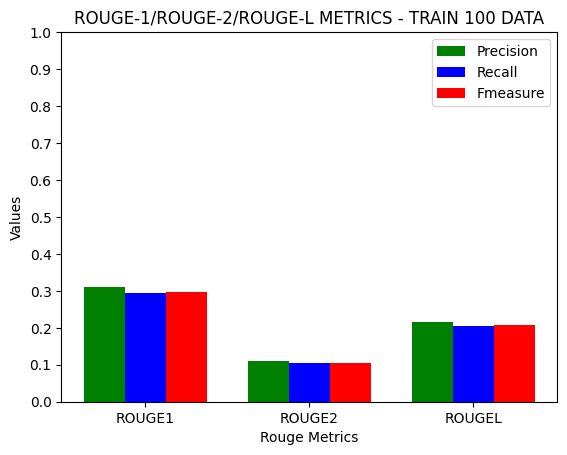

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
  
# creating the dataset
json_data = {}

with open("t5_rouge_100.json") as data_file:
  json_data = json.load(data_file)

precision = []
recall = []
fmeasure = []
for metric, values in json_data.items():
  precision.append(values[0])
  recall.append(values[1])
  fmeasure.append(values[2])

print(json_data)
rouge_metrics = list(json_data.keys())
  
br1 = np.arange(len(precision))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

plt.bar(br1, precision, color ='green', label="Precision", width=0.25)
plt.bar(br2, recall, color ='blue', label="Recall", width=0.25)
plt.bar(br3, fmeasure, color ='red', label="Fmeasure", width=0.25)

plt.xlabel("Rouge Metrics")
plt.ylabel("Values")
plt.xticks([r + 0.25 for r in range(len(precision))],
        ["ROUGE1", "ROUGE2", "ROUGEL"])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title("ROUGE-1/ROUGE-2/ROUGE-L METRICS - TRAIN 100 DATA")
plt.legend()
plt.show()

{'rouge1': [0.33841387624448616, 0.4024603152306834, 0.35607742278611504], 'rouge2': [0.13860165594675045, 0.16435317741790775, 0.14554879479353447], 'rougeL': [0.23941206836273032, 0.28221651144306226, 0.250852467050716]}


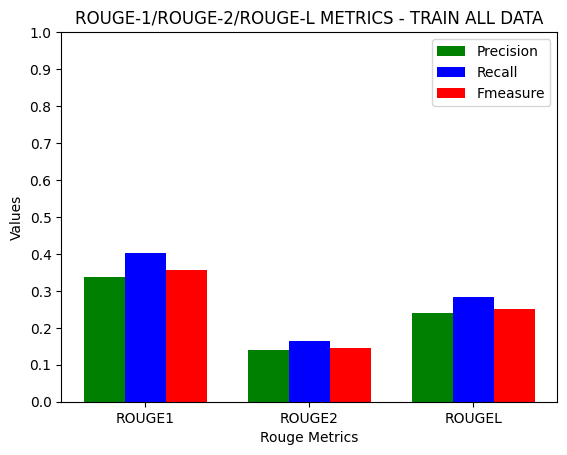

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
  
# creating the dataset
json_data = {}

with open("t5_rouge_all.json") as data_file:
  json_data = json.load(data_file)

precision = []
recall = []
fmeasure = []
for metric, values in json_data.items():
  precision.append(values[0])
  recall.append(values[1])
  fmeasure.append(values[2])

print(json_data)
rouge_metrics = list(json_data.keys())
  
br1 = np.arange(len(precision))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

plt.bar(br1, precision, color ='green', label="Precision", width=0.25)
plt.bar(br2, recall, color ='blue', label="Recall", width=0.25)
plt.bar(br3, fmeasure, color ='red', label="Fmeasure", width=0.25)

plt.xlabel("Rouge Metrics")
plt.ylabel("Values")
plt.xticks([r + 0.25 for r in range(len(precision))],
        ["ROUGE1", "ROUGE2", "ROUGEL"])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title("ROUGE-1/ROUGE-2/ROUGE-L METRICS - TRAIN ALL DATA")
plt.legend()
plt.show()

# **Using BART Transformers**

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

In [ ]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

In [ ]:
input_text = '''
(CNN)  -- The National Football League has indefinitely suspended Atlanta Falcons quarterback Michael Vick without pay, officials with the league said Friday. NFL star Michael Vick is set to appear in court Monday. A judge will have the final say on a plea deal. Earlier, Vick admitted to participating in a dogfighting ring as part of a plea agreement with federal prosecutors in Virginia. \"Your admitted conduct was not only illegal, but also cruel and reprehensible. Your team, the NFL, and NFL fans have all been hurt by your actions,\" NFL Commissioner Roger Goodell said in a letter to Vick. Goodell said he would review the status of the suspension after the legal proceedings are over. In papers filed Friday with a federal court in Virginia, Vick also admitted that he and two co-conspirators killed dogs that did not fight well. Falcons owner Arthur Blank said Vick's admissions describe actions that are \"incomprehensible and unacceptable.\" The suspension makes \"a strong statement that conduct which tarnishes the good reputation of the NFL will not be tolerated,\" he said in a statement.  Watch what led to Vick's suspension \u00bb . Goodell said the Falcons could \"assert any claims or remedies\" to recover $22 million of Vick's signing bonus from the 10-year, $130 million contract he signed in 2004, according to The Associated Press. Vick said he would plead guilty to one count of \"Conspiracy to Travel in Interstate Commerce in Aid of Unlawful Activities and to Sponsor a Dog in an Animal Fighting Venture\" in a plea agreement filed at U.S. District Court in Richmond, Virginia. The charge is punishable by up to five years in prison, a $250,000 fine, \"full restitution, a special assessment and 3 years of supervised release,\" the plea deal said. Federal prosecutors agreed to ask for the low end of the sentencing guidelines. \"The defendant will plead guilty because the defendant is in fact guilty of the charged offense,\" the plea agreement said. In an additional summary of facts, signed by Vick and filed with the agreement, Vick admitted buying pit bulls and the property used for training and fighting the dogs, but the statement said he did not bet on the fights or receive any of the money won. \"Most of the 'Bad Newz Kennels' operations and gambling monies were provided by Vick,\" the official summary of facts said. Gambling wins were generally split among co-conspirators Tony Taylor, Quanis Phillips and sometimes Purnell Peace, it continued. \"Vick did not gamble by placing side bets on any of the fights. Vick did not receive any of the proceeds from the purses that were won by 'Bad Newz Kennels.' \" Vick also agreed that \"collective efforts\" by him and two others caused the deaths of at least six dogs. Around April, Vick, Peace and Phillips tested some dogs in fighting sessions at Vick's property in Virginia, the statement said. \"Peace, Phillips and Vick agreed to the killing of approximately 6-8 dogs that did not perform well in 'testing' sessions at 1915 Moonlight Road and all of those dogs were killed by various methods, including hanging and drowning. \"Vick agrees and stipulates that these dogs all died as a result of the collective efforts of Peace, Phillips and Vick,\" the summary said. Peace, 35, of Virginia Beach, Virginia; Phillips, 28, of Atlanta, Georgia; and Taylor, 34, of Hampton, Virginia, already have accepted agreements to plead guilty in exchange for reduced sentences. Vick, 27, is scheduled to appear Monday in court, where he is expected to plead guilty before a judge.  See a timeline of the case against Vick \u00bb . The judge in the case will have the final say over the plea agreement. The federal case against Vick focused on the interstate conspiracy, but Vick's admission that he was involved in the killing of dogs could lead to local charges, according to CNN legal analyst Jeffrey Toobin. \"It sometimes happens -- not often -- that the state will follow a federal prosecution by charging its own crimes for exactly the same behavior,\" Toobin said Friday. \"The risk for Vick is, if he makes admissions in his federal guilty plea, the state of Virginia could say, 'Hey, look, you admitted violating Virginia state law as well. We're going to introduce that against you and charge you in our court.' \" In the plea deal, Vick agreed to cooperate with investigators and provide all information he may have on any criminal activity and to testify if necessary. Vick also agreed to turn over any documents he has and to submit to polygraph tests. Vick agreed to \"make restitution for the full amount of the costs associated\" with the dogs that are being held by the government. \"Such costs may include, but are not limited to, all costs associated with the care of the dogs involved in that case, including if necessary, the long-term care and/or the humane euthanasia of some or all of those animals.\" Prosecutors, with the support of animal rights activists, have asked for permission to euthanize the dogs. But the dogs could serve as important evidence in the cases against Vick and his admitted co-conspirators. Judge Henry E. Hudson issued an order Thursday telling the U.S. Marshals Service to \"arrest and seize the defendant property, and use discretion and whatever means appropriate to protect and maintain said defendant property.\" Both the judge's order and Vick's filing refer to \"approximately\" 53 pit bull dogs. After Vick's indictment last month, Goodell ordered the quarterback not to report to the Falcons training camp, and the league is reviewing the case. Blank told the NFL Network on Monday he could not speculate on Vick's future as a Falcon, at least not until he had seen \"a statement of facts\" in the case.  E-mail to a friend . CNN's Mike Phelan contributed to this report.
'''
input_ids = tokenizer.encode(input_text, truncation=True, return_tensors='pt')
summary_ids = model.generate(input_ids, num_beams=4, early_stopping=True)
summary = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
print(summary)

NEW: Atlanta Falcons owner Arthur Blank calls Vick's actions "incomprehensible" Vick agrees to plead guilty to conspiracy to travel in interstate commerce. Vick also agrees to cooperate with investigators and provide information. NFL Commissioner Roger Goodell says he will review status of suspension after legal proceedings.


In [ ]:
# text = "Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.Â 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space in the overhead lockers, crashing elbows and seat back kicking? Tests conducted by the FAA use planes with a 31 inch pitch, a standard which on some airlines has decreased . Many economy seats on United Airlines have 30 inches of room, while some airlines offer as little as 28 inches . Cynthia Corbertt, a human factors researcher with the Federal Aviation Administration, that it conducts tests on how quickly passengers can leave a plane. But these tests are conducted using planes with 31 inches between each row of seats, a standard which on some airlines has decreased, reported the Detroit News. The distance between two seats from one point on a seat to the same point on the seat behind it is known as the pitch. While most airlines stick to a pitch of 31 inches or above, some fall below this. While United Airlines has 30 inches of space, Gulf Air economy seats have between 29 and 32 inches, Air Asia offers 29 inches and Spirit Airlines offers just 28 inches. British Airways has a seat pitch of 31 inches, while easyJet has 29 inches, Thomson's short haul seat pitch is 28 inches, and Virgin Atlantic's is 30-31."
import spacy
nlp = spacy.load('en_core_web_sm')

json_data = {}
with open("train_100.json") as data_file:
  json_data = json.load(data_file)

start = time.time()

for article_index, details in json_data.items():
  text = details['article']
  print("+++++++++++++++++++++++++++ Article_Index :", article_index,"+++++++++++++++++++++++++++")

  input_ids = tokenizer.encode(text, truncation=True, return_tensors='pt')
  summary_ids = model.generate(input_ids, num_beams=4, early_stopping=True)
  summary_text = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
  print(summary_text)

  bart_summary = nlp(summary_text)
  details['bart_summary'] = summary_text
  details['bart_summary_len'] = len([s for s in bart_summary.sents])

end = time.time()

print("------------- TIME / ANALYSIS --------------")
print("Time Taken : ", (end-start)/60, "minutes")

+++++++++++++++++++++++++++ Article_Index : 0 +++++++++++++++++++++++++++
Harry Potter star Daniel Radcliffe turns 18 on Monday. He gains access to a reported £20 million ($41.1 million) fortune. Radcliffe's earnings from the first five Potter films have been held in a trust fund. Details of how he'll mark his landmark birthday are under wraps.
+++++++++++++++++++++++++++ Article_Index : 1 +++++++++++++++++++++++++++
Judge Steven Leifman is an advocate for justice and the mentally ill. About one-third of all people in Miami-Dade county jails are mentally ill, he says. He says the sheer volume is overwhelming the system. Starting in 2008, many inmates will be sent to a new mental health facility.
+++++++++++++++++++++++++++ Article_Index : 2 +++++++++++++++++++++++++++
NEW: "I probably had a 30-, 35-foot free fall," survivor Gary Babineau says. NEW: "My truck was completely face down, pointed toward the ground, and my truck got ripped in half," he says. Emergency room physician John Hin

In [ ]:
import json

json_details = json.dumps(json_data)
f = open("train_bart_100.json","w")
f.write(json_details)
f.close()

In [ ]:
# text = "Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.Â 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for space in the overhead lockers, crashing elbows and seat back kicking? Tests conducted by the FAA use planes with a 31 inch pitch, a standard which on some airlines has decreased . Many economy seats on United Airlines have 30 inches of room, while some airlines offer as little as 28 inches . Cynthia Corbertt, a human factors researcher with the Federal Aviation Administration, that it conducts tests on how quickly passengers can leave a plane. But these tests are conducted using planes with 31 inches between each row of seats, a standard which on some airlines has decreased, reported the Detroit News. The distance between two seats from one point on a seat to the same point on the seat behind it is known as the pitch. While most airlines stick to a pitch of 31 inches or above, some fall below this. While United Airlines has 30 inches of space, Gulf Air economy seats have between 29 and 32 inches, Air Asia offers 29 inches and Spirit Airlines offers just 28 inches. British Airways has a seat pitch of 31 inches, while easyJet has 29 inches, Thomson's short haul seat pitch is 28 inches, and Virgin Atlantic's is 30-31."
import spacy
nlp = spacy.load('en_core_web_sm')

json_data = {}
with open("train_all.json") as data_file:
  json_data = json.load(data_file)

start = time.time()

for article_index, details in json_data.items():
  text = details['article']
  print("+++++++++++++++++++++++++++ Article_Index :", article_index,"+++++++++++++++++++++++++++")

  input_ids = tokenizer.encode(text, truncation=True, return_tensors='pt')
  summary_ids = model.generate(input_ids, num_beams=4, early_stopping=True)
  summary_text = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
  print(summary_text)

  bart_summary = nlp(summary_text)
  details['bart_summary'] = summary_text
  details['bart_summary_len'] = len([s for s in bart_summary.sents])

end = time.time()

print("------------- TIME / ANALYSIS --------------")
print("Time Taken : ", (end-start)/60, "minutes")

+++++++++++++++++++++++++++ Article_Index : 0 +++++++++++++++++++++++++++
The Palestinian Authority becomes the 123rd member of the International Criminal Court. The move gives the court jurisdiction over alleged crimes in Palestinian territories. Israel and the United States opposed the Palestinians' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki said it was a move toward greater justice.
+++++++++++++++++++++++++++ Article_Index : 1 +++++++++++++++++++++++++++
Theia, a one-year-old bully breed mix, was hit by a car and buried in a field. Four days after her apparent death, the dog managed to stagger to a nearby farm. She suffered a dislocated jaw, leg injuries and a caved-in sinus cavity. She still requires surgery to help her breathe.
+++++++++++++++++++++++++++ Article_Index : 2 +++++++++++++++++++++++++++
Mohammad Javad Zarif is the Iranian foreign minister. He has been John Kerry's opposite number in securing a breakthrough in nuclear discussions. He rec

In [ ]:
import json

json_details = json.dumps(json_data)
f = open("train_bart_all.json","w")
f.write(json_details)
f.close()

# **ROUGE EVALUATION**

**ROUGE EVALUATION FOR TRAIN_100 JSON DATA**

In [ ]:
import json
from rouge_score import rouge_scorer

json_data = {}

print("=======================================")
print("=============TRAIN_DATA_100============")
print("=======================================")
with open("train_bart_100.json") as data_file:
  json_data = json.load(data_file)

# print(json_data)

overall_precision_1 = 0
overall_recall_1 = 0
overall_fmeasure_1 = 0

overall_precision_2 = 0
overall_recall_2 = 0
overall_fmeasure_2 = 0

overall_precision_l = 0
overall_recall_l = 0
overall_fmeasure_l = 0

for article_index, details in json_data.items():
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  scores = scorer.score(details['bart_summary'], details['highlights'])
  
  precision1,recall1,fmeasure1 = scores['rouge1']
  overall_precision_1 += precision1
  overall_recall_1 += recall1
  overall_fmeasure_1 += fmeasure1
  
  precision2,recall2,fmeasure2 = scores['rouge2']
  overall_precision_2 += precision2
  overall_recall_2 += recall2
  overall_fmeasure_2 += fmeasure2
  
  precisionl,recalll,fmeasurel = scores['rougeL']
  overall_precision_l += precisionl
  overall_recall_l += recalll
  overall_fmeasure_l += fmeasurel

print("ROUGE-1 METRIC")
print("Overall Precision", overall_precision_1/len(json_data.keys()))
print("Overall Recall", overall_recall_1/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_1/len(json_data.keys()))

print("ROUGE-2 METRIC")
print("Overall Precision", overall_precision_2/len(json_data.keys()))
print("Overall Recall", overall_recall_2/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_2/len(json_data.keys()))

print("ROUGE-L METRIC")
print("Overall Precision", overall_precision_l/len(json_data.keys()))
print("Overall Recall", overall_recall_l/len(json_data.keys()))
print("Overall Fmeasure", overall_fmeasure_l/len(json_data.keys()))

metrics = {}
metrics['rouge1'] = [overall_precision_1/len(json_data.keys()), overall_recall_1/len(json_data.keys()), overall_fmeasure_1/len(json_data.keys())]
metrics['rouge2'] = [overall_precision_2/len(json_data.keys()), overall_recall_2/len(json_data.keys()), overall_fmeasure_2/len(json_data.keys())]
metrics['rougeL'] = [overall_precision_l/len(json_data.keys()), overall_recall_l/len(json_data.keys()), overall_fmeasure_l/len(json_data.keys())]
json = json.dumps(metrics)
f = open("bart_rouge_100.json","w")
f.write(json)
f.close()

=============TRAIN_DATA_100============
ROUGE-1 METRIC
Overall Precision 0.4584804085269929
Overall Recall 0.3563554119768593
Overall Fmeasure 0.3972971212083671
ROUGE-2 METRIC
Overall Precision 0.18974878028709682
Overall Recall 0.14640519715764982
Overall Fmeasure 0.16370837217997627
ROUGE-L METRIC
Overall Precision 0.31788171543573707
Overall Recall 0.2455743719665017
Overall Fmeasure 0.2745091025119543


**Visualizing the ROUGE Metric**

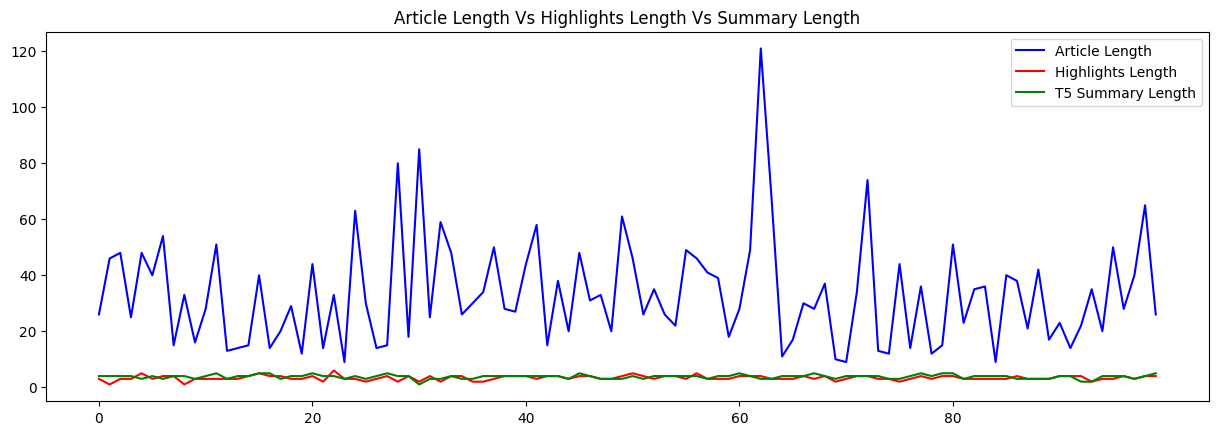

In [ ]:
import matplotlib.pyplot as plt 
import json
import numpy as np

json_data = {}

with open("train_bart_100.json") as data_file:
  json_data = json.load(data_file)

epochs = []
article_lens = []
highlight_lens = []
summary_lens = []

for data_key, data in json_data.items():
  epochs.append(data_key)
  article_lens.append(data['article_len'])
  highlight_lens.append(data['highlights_len'])
  summary_lens.append(data['bart_summary_len'])

plt.figure().set_figwidth(15)
plt.plot(epochs, article_lens, label='Article Length', color="blue")
plt.plot(epochs, highlight_lens, label='Highlights Length', color="red")
plt.plot(epochs, summary_lens, label='T5 Summary Length', color="green")
plt.xticks(np.arange(0, 99, 20))
plt.legend()
plt.title('Article Length Vs Highlights Length Vs Summary Length')
plt.show()

{'rouge1': [0.4584804085269929, 0.3563554119768593, 0.3972971212083671], 'rouge2': [0.18974878028709682, 0.14640519715764982, 0.16370837217997627], 'rougeL': [0.31788171543573707, 0.2455743719665017, 0.2745091025119543]}


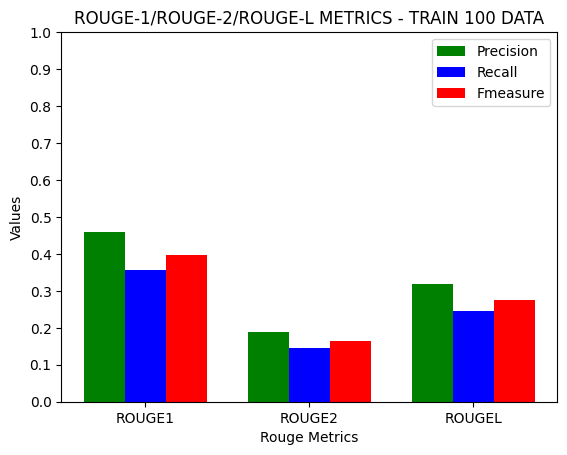

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
  
# creating the dataset
json_data = {}

with open("bart_rouge_100.json") as data_file:
  json_data = json.load(data_file)

precision = []
recall = []
fmeasure = []
for metric, values in json_data.items():
  precision.append(values[0])
  recall.append(values[1])
  fmeasure.append(values[2])

print(json_data)
rouge_metrics = list(json_data.keys())
  
br1 = np.arange(len(precision))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

plt.bar(br1, precision, color ='green', label="Precision", width=0.25)
plt.bar(br2, recall, color ='blue', label="Recall", width=0.25)
plt.bar(br3, fmeasure, color ='red', label="Fmeasure", width=0.25)

plt.xlabel("Rouge Metrics")
plt.ylabel("Values")
plt.xticks([r + 0.25 for r in range(len(precision))],
        ["ROUGE1", "ROUGE2", "ROUGEL"])
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title("ROUGE-1/ROUGE-2/ROUGE-L METRICS - TRAIN 100 DATA")
plt.legend()
plt.show()